# Verana Health Data Challenge
Lindsey Clark


2019-11-14

Thank you for accepting our data challenge! Please answer the questions as well as you can, and send us back an annotated notebook or file in four hours from the time you receive this. It may not take you that long, and you may not be able to finish. It is okay if all questions cannot be fully completed within the timeframe. If something cannot be completed in time, please write a description of how you would approach the question and pseudo-code. Have fun!

Instructions:
•	Use SQL to answer some questions and Python to answer others. As much of your code as possible should be executable (Python in particular). If you are not set up to run SQL on your machine, you can write and run the code in Python and write a SQL query that does the same thing for one or two of the questions.
•	Write down any assumptions you are making for a question.
•	You can use any publicly-available resources such as stackoverflow.com to help complete the challenge.
•	Note: This dataset is largely fabricated and not taken from the clinical databases Verana Health leverages.


Answers to Questions:
1.	Spend some time exploring the data and show or discuss what you find. What are the types of data quality issues will have to consider?


<font color='green'>I first read each of the 4 files into a pandas dataframe. I used the describe, info, head, nunique, and isna methods to begin to understand the data. The patient_demographics has 4 columns (patient_id, male, age, and eduction), 4240 rows of data, 105 null values in the 'education' column, 4 unique values in the education column (1-4), and 'male' is binary 0 and 1. I assume that 1 indicates male, 0 indicates female. 
    
    
Secondly, the patient_history file has 7 columns (patient_id, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, and diabetes), describing certain health characteristics. There are 4229 total rows in this dataset. Apart from cigsPerDay, the other columns have either a 0 or 1, indicating true/false. The cigsPerDay and BPMeds columns have 29 and 53 null values, respectively. 
    
    
Thirdly, the patient_clinical file has 4231 entries, 9 columns, describing clinical characteristics (patient_id, diagnosis_code, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD). These data elements are mostly floats/ints, and there are more null values (diagnosis_code has 287, totChol has 50, BMI 19, and glucose 386). I assume these values may have been collected on a specific day for an office visit. The diagnosis_code column is peculiar--it seems to be a mix of icd codes and possibly procedure codes. 
    
    
Lastly, the patient_note has 2611 entries, several columns that are null. The 'note' column has 16 unique values/notes. I assume these are physician notes from the visit above. 
    
    
Usually, missing data is the first data quality issue to be considered. These data seem relatively complete, with only a small proportion of missing values in most columns. The largest proportion of missing values seems to be glucose, around 9% of those values missing. The patient_note only has 2611 total entries, and based on the other datasets, there are ~4240 unique patients in this dataset. I will have a better understanding of total unqiue patient id's when I combine the datasets. The veracity of the data is the next data quality issue to consider. For example, one record had a glucose level of 394. This is quite high, so if this person does not have diabetes, then I might question the validity of that measurement, particularly if that's a fasting glucose. 
    
    
I also created some graphical representations of male/female, age, and clinical values to gain a better understanding of the data (see below). </font>

2.	Medical Device Company A comes to us and wants to find out how many patients with diabetes are under 75, have the following diagnostic codes: 408850009, 232063007, 232053004, a total Cholesterol reading between 185 and 230, and a diastolic blood pressure reading of over 100? 

<font color='green'>In the dataset, all patients are less than 75 years. After applying the criteria to the entire merged datasets, I did not find any patients who met all the criteria listed. See below.
</font>
    
3.	Pharma Co. Z has a product on the market to prevent heart attacks. They want to study patients who complain of signs of heart attacks to their doctors. Specifically, they are interested in knowing how many patients complaining of pain, fluttering, pressure or tightness in their chest have that documented in the notes of their record. Write code for and provide counts of how many unique patients match this criteria. Write a short summary to the client communicating what you did. If we wanted to recommend a more advanced text search, what would you suggest doing?

<font color='green'>Based on the question, the patient_note table is of interest here. There are only 16 unique values in the 'Note' field, and the ones that would identify the patients of interest include: 'patient reports fluttering and irregular pain', 'PRO: tightness in chest', 'patient reports being out of breath, feeling pain in the chest', 'patient reports feeling pressure in the chest off and on', and 'chest pain'. I looked at all patient id's with one or more of these notes, and it resulted in 805 unique patien id's who fit this citeria. A more advanced text search would probably look for key words instead of the specific string of words, although you must be careful to not just look for 'pain.' The pharma company is specifically looking for pain or fluttering in the chest area. 
</font>

4.	Pharma Co. Z has a couple of follow-up questions after seeing the results of their previous inquiry. 
a.	How many patients are male, have diagnoses: 232065000 or H35.52, and the physician noted the patient complains of pain, fluttering, pressure or tightness in their chest?

<font color='green'>There are 10 total patients who meet all the above criteria.</font>

b.	How many patients with either of the two diagnoses might have experienced those symptoms, but cannot be confirmed using this data? Write 1-2 sentences for Pharma Co. Z about why this might be the case. 

<font color='green'>There are 50 total male patients who have either of the 2 diagnosis codes, and interestingly, there are also 50 total females who have either of the 2 diagnosis codes. We know that the patient_notes data might be incomplete since there are many less records in that dataset. I checked to see if the male patients in patient_notes were also in the patien_clinical, and they were. Thus, there are 40 males patients (50-10) that we cannot confirm would have these symptoms and might be candidates. </font>

5.	Are the distributions of cholesterol values different for smokers vs. non-smokers? Create a visualization to display this. 

<font color='green'>Based on a histogram of smoker and non-smoker, the distributions look very similar.</font>



In [26]:
#import libraries
import pandas as pd
from IPython.display import display
import matplotlib as plt

In [2]:
#read in the data to pandas dataframes
patient_demographics = pd.read_csv('/Users/lindseyclark/Documents/verana_data_challenge/data_split/patient_demographics.csv')
patient_history = pd.read_csv('/Users/lindseyclark/Documents/verana_data_challenge/data_split/patient_history.csv')
patient_clinical = pd.read_csv('/Users/lindseyclark/Documents/verana_data_challenge/data_split/patient_clinical.csv')
patient_note = pd.read_csv('/Users/lindseyclark/Documents/verana_data_challenge/data_split/patient_note.csv')

# Question 1: Data Exploration

In [14]:
#describe the data, get unique values, and explore null and unique values
data_list = [patient_demographics, patient_history, patient_clinical, patient_note]
for data in data_list:
    display(data.head())
    display(data.describe())
    display(data.info())
    display(data.isna().sum())
    display(data.nunique())
    print('Moving to next dataset')
    print
    print
    print

,patient_id,male,age,education
0,KTL2DSJHL4SDNB9542T487EN4,1,39,4.0
1,EJWLMX3E4GUHSZJHNSY8ZQA9F,0,46,2.0
2,4P9XZP35HB43N2LN6SNYCTQ6C,1,48,1.0
3,2C24GKDFF9LYAADZNDJ4UMCLH,0,61,3.0
4,WCYHBETYRVUD4ATKEXDEPQ9UW,0,46,3.0


,male,age,education
count,4240.000000,4240.000000,4135.000000
mean,0.429245,49.580189,1.979444
std,0.495027,8.572942,1.019791
min,0.000000,32.000000,1.000000
25%,0.000000,42.000000,1.000000
50%,0.000000,49.000000,2.000000
75%,1.000000,56.000000,3.000000
max,1.000000,70.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 4 columns):
patient_id    4240 non-null object
male          4240 non-null int64
age           4240 non-null int64
education     4135 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 132.6+ KB


None

patient_id      0
male            0
age             0
education     105
dtype: int64

patient_id    4240
male             2
age             39
education        4
dtype: int64

Moving to next dataset





,patient_id,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,ZKFEHEA2YVD6E5HRJKVWWCU9P,0,0.0,0.0,0,0,0
1,V7NNJV6JVBEW2AGXJ826HQJGM,1,15.0,0.0,0,1,0
2,K3FVYMBPSVCHDSYJ3XS9GRLJX,0,0.0,1.0,0,1,0
3,S5GX8TACV8LZQHJAAR97ZDLD4,1,9.0,0.0,0,0,0
4,J36F2BMH8ZLFSDC4V48CY7974,1,20.0,0.0,0,1,0


,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
count,4229.000000,4200.000000,4176.000000,4229.000000,4229.000000,4229.000000
mean,0.494207,9.000238,0.029693,0.005912,0.310475,0.025774
std,0.500026,11.920042,0.169761,0.076668,0.462743,0.158480
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 7 columns):
patient_id         4229 non-null object
currentSmoker      4229 non-null int64
cigsPerDay         4200 non-null float64
BPMeds             4176 non-null float64
prevalentStroke    4229 non-null int64
prevalentHyp       4229 non-null int64
diabetes           4229 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 231.3+ KB


None

patient_id          0
currentSmoker       0
cigsPerDay         29
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
dtype: int64

patient_id         4229
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
dtype: int64

Moving to next dataset





,patient_id,diagnosis_code,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,KTL2DSJHL4SDNB9542T487EN4,719520001,195.0,106.0,70.0,26.97,80.0,77.0,0
1,EJWLMX3E4GUHSZJHNSY8ZQA9F,763387005,250.0,121.0,81.0,28.73,95.0,76.0,0
2,4P9XZP35HB43N2LN6SNYCTQ6C,231996009,245.0,127.5,80.0,25.34,75.0,70.0,0
3,2C24GKDFF9LYAADZNDJ4UMCLH,312921000,225.0,150.0,95.0,28.58,65.0,103.0,1
4,WCYHBETYRVUD4ATKEXDEPQ9UW,H35.35,285.0,130.0,84.0,23.10,85.0,85.0,0


,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4181.000000,4231.000000,4231.000000,4212.000000,4230.000000,3845.000000,4231.000000
mean,236.711791,132.353817,82.903687,25.800081,75.878960,81.968531,0.151501
std,44.626396,22.044951,11.917521,4.079721,12.027182,23.974108,0.358579
min,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,234.000000,128.000000,82.000000,25.395000,75.000000,78.000000,0.000000
75%,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 9 columns):
patient_id        4231 non-null object
diagnosis_code    3944 non-null object
totChol           4181 non-null float64
sysBP             4231 non-null float64
diaBP             4231 non-null float64
BMI               4212 non-null float64
heartRate         4230 non-null float64
glucose           3845 non-null float64
TenYearCHD        4231 non-null int64
dtypes: float64(6), int64(1), object(2)
memory usage: 297.6+ KB


None

patient_id          0
diagnosis_code    287
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose           386
TenYearCHD          0
dtype: int64

patient_id        4231
diagnosis_code      69
totChol            248
sysBP              234
diaBP              146
BMI               1362
heartRate           73
glucose            143
TenYearCHD           2
dtype: int64

Moving to next dataset





,patient_id,Note,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,E93UGY2VH6E57HFKJVN9CDHL8,we discussed smoking and family history and I ...,NaN,NaN,NaN,NaN,NaN,NaN
1,L4THW2UC3JTGA592ZEPPSCWCJ,we discussed smoking and family history and I ...,NaN,NaN,NaN,NaN,NaN,NaN
2,9TB3L57J9RRBGS57RPVDHB6UB,patient reports fluttering and irregular pain,NaN,NaN,NaN,NaN,NaN,NaN
3,RRVZHGSW8TYXQH9JZNUJBJS3L,PRO: tightness in chest,NaN,NaN,NaN,NaN,NaN,NaN
4,9ZF2PDLK987YFEBQXG92KPPQS,patient reports pain in foot but otherwise say...,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 8 columns):
patient_id    2611 non-null object
Note          2611 non-null object
Unnamed: 2    0 non-null float64
Unnamed: 3    0 non-null float64
Unnamed: 4    0 non-null float64
Unnamed: 5    0 non-null float64
Unnamed: 6    0 non-null float64
Unnamed: 7    0 non-null float64
dtypes: float64(6), object(2)
memory usage: 163.3+ KB


None

patient_id       0
Note             0
Unnamed: 2    2611
Unnamed: 3    2611
Unnamed: 4    2611
Unnamed: 5    2611
Unnamed: 6    2611
Unnamed: 7    2611
dtype: int64

patient_id    2611
Note            16
Unnamed: 2       0
Unnamed: 3       0
Unnamed: 4       0
Unnamed: 5       0
Unnamed: 6       0
Unnamed: 7       0
dtype: int64

Moving to next dataset





[Text(0,0.5,'Male'), Text(0.5,0,'Count of Patients')]

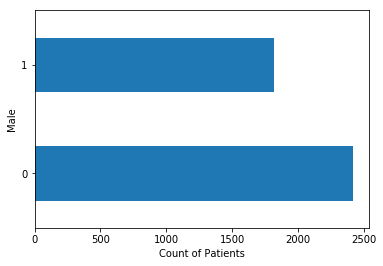

In [30]:
#Distribution of male/female
#patient_demographics.groupby(['male']).count().plot(kind='bar')
ax1 = patient_demographics['male'].value_counts().plot(kind='barh')
ax1.set(xlabel='Count of Patients', ylabel='Male')

[Text(0,0.5,'Count of Patients'), Text(0.5,0,'Age')]

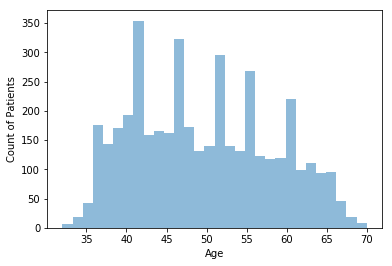

In [31]:
#Histogram of age
ax2 = patient_demographics['age'].plot.hist(bins=30, alpha=0.5)
ax2.set(xlabel='Age', ylabel='Count of Patients')

[Text(0,0.5,'Count of Patients'), Text(0.5,0,'Diabetes')]

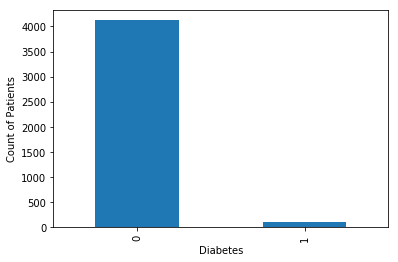

In [32]:
#Distribution of diabetes
#patient_demographics.groupby(['male']).count().plot(kind='bar')
ax3 = patient_history['diabetes'].value_counts().plot(kind='bar')
ax3.set(xlabel='Diabetes', ylabel='Count of Patients')
  

# Question 2: Find patients for Medical Device Company

In [73]:
#All patients are < 75. 

In [74]:
#merge all records ecxcept the notes
total_records = patient_demographics.merge(patient_history,on='patient_id').merge(patient_clinical,on='patient_id')
total_records.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4220.000000,4220.000000,4115.000000,4220.000000,4191.000000,4167.000000,4220.000000,4220.000000,4220.000000,4170.000000,4220.000000,4220.000000,4201.000000,4219.000000,3834.000000,4220.000000
mean,0.429384,49.579384,1.979344,0.494076,8.994989,0.029758,0.005924,0.310427,0.025829,236.692326,132.345972,82.898460,25.798441,75.872956,81.964789,0.151422
std,0.495047,8.574678,1.019409,0.500024,11.915984,0.169938,0.076749,0.462723,0.158645,44.652111,22.044251,11.913075,4.081290,12.031607,24.002773,0.358502
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.390000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [134]:
#Create variable with TRUE if diabetes
diabetes = total_records['diabetes'] == 1

#Create variable with TRUE if diagnosis codes
diagnosis = total_records['diagnosis_code'].isin(['408850009', '232063007', '232053004'])

#Create variable with cholesterol reading between 185 and 230
cholesterol = total_records['totChol'].between(185, 230)

#Create variable with diastolic blood pressure over 100
diaBP = total_records['diaBP']>100

# Select all cases 
total_records[diabetes & diagnosis & cholesterol & diaBP]


,patient_id,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,diagnosis_code,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [136]:
#OR Can parse with multiple conditions
patients_for_med_device = total_records[
    (total_records['diabetes'] == 1) & 
    (total_records['diagnosis_code'].isin(['408850009', '232063007', '232053004'])) &
    (total_records['totChol'].between(185, 230)) &
    (total_records['diaBP']>100)
]
patients_for_med_device

,patient_id,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,diagnosis_code,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


# Question 3: Pharma Co. Z Patient ID


In [141]:
#List nunique values in the patient_note table
patient_note.Note.unique()

array(['we discussed smoking and family history and I counseled them to lose weight',
       'patient reports fluttering and irregular pain',
       'PRO: tightness in chest',
       'patient reports pain in foot but otherwise says they feel fine',
       'patient reports being out of breath, feeling pain in the chest',
       'medication review',
       'patient reports feeling pressure in the chest off and on',
       'Nausea, indigestion, heartburn (PRN)', 'F/U to procedure',
       'patient often fatigued', 'routine visit and labwork',
       'insurance denied new medicaiton',
       'we discussed improving diet and getting more exercise',
       'patient reports pain in arm but otherwise says they feel fine',
       'chest pain',
       'patient reports pain in leg but otherwise says they feel fine'],
      dtype=object)

In [146]:
#The strings of interest 
pharma_coz_patients = patient_note[patient_note['Note'].isin(['patient reports fluttering and irregular pain', 
                                                 'PRO: tightness in chest', 
                                                 'patient reports being out of breath, feeling pain in the chest',
                                                 'patient reports feeling pressure in the chest off and on',
                                                 'chest pain'])]

In [148]:
pharma_coz_patients.nunique()

patient_id    805
Note            5
Unnamed: 2      0
Unnamed: 3      0
Unnamed: 4      0
Unnamed: 5      0
Unnamed: 6      0
Unnamed: 7      0
dtype: int64

# Question 4: Pharma Co. Z Follow-up

In [151]:
#How many patients are male, have diagnoses: 232065000 or H35.52, and the physician noted the patient 
    #complains of pain, fluttering, pressure or tightness in their chest?
#merge demographic, note, and clinical records
total_records_q4 = patient_demographics.merge(patient_clinical,on='patient_id').merge(patient_note,on='patient_id')
total_records_q4

,patient_id,male,age,education,diagnosis_code,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Note,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,EJWLMX3E4GUHSZJHNSY8ZQA9F,0,46,2.0,763387005,250.0,121.0,81.0,28.73,95.0,76.0,0,insurance denied new medicaiton,NaN,NaN,NaN,NaN,NaN,NaN
1,2C24GKDFF9LYAADZNDJ4UMCLH,0,61,3.0,312921000,225.0,150.0,95.0,28.58,65.0,103.0,1,routine visit and labwork,NaN,NaN,NaN,NaN,NaN,NaN
2,WCYHBETYRVUD4ATKEXDEPQ9UW,0,46,3.0,H35.35,285.0,130.0,84.0,23.10,85.0,85.0,0,medication review,NaN,NaN,NaN,NaN,NaN,NaN
3,B5DZEQXVEJJUW39BFSEEW88B4,0,43,2.0,H35.351,228.0,180.0,110.0,30.30,77.0,99.0,0,patient reports feeling pressure in the chest ...,NaN,NaN,NaN,NaN,NaN,NaN
4,9ED2YTEVCTN7KCN2B76SBXQC9,1,43,1.0,362.53,225.0,162.0,107.0,23.61,93.0,88.0,0,routine visit and labwork,NaN,NaN,NaN,NaN,NaN,NaN
5,V7NNJV6JVBEW2AGXJ826HQJGM,1,46,1.0,232050001,294.0,142.0,94.0,26.31,98.0,64.0,0,patient reports fluttering and irregular pain,NaN,NaN,NaN,NaN,NaN,NaN
6,K3FVYMBPSVCHDSYJ3XS9GRLJX,0,41,3.0,193410003,332.0,124.0,88.0,31.31,65.0,84.0,0,F/U to procedure,NaN,NaN,NaN,NaN,NaN,NaN
7,J36F2BMH8ZLFSDC4V48CY7974,0,38,2.0,719431007,221.0,140.0,90.0,21.35,95.0,70.0,1,medication review,NaN,NaN,NaN,NaN,NaN,NaN
8,KDZWAY9GZQC4Z4X4WL5QMFUPH,0,46,2.0,267613004,291.0,112.0,78.0,23.38,80.0,89.0,1,routine visit and labwork,NaN,NaN,NaN,NaN,NaN,NaN
9,XJETL8S4R3EM9WG5KXLFVJCVK,0,38,2.0,28835009,195.0,122.0,84.5,23.24,75.0,78.0,0,patient reports feeling pressure in the chest ...,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
#check for records that meet the stated criteria and get unique numbers of patients
pharma_follow_up_a = total_records_q4[
    (total_records_q4['male'] == 1) & 
    (total_records_q4['Note'].isin(['patient reports fluttering and irregular pain', 
                                                 'PRO: tightness in chest', 
                                                 'patient reports being out of breath, feeling pain in the chest',
                                                 'patient reports feeling pressure in the chest off and on',
                                                 'chest pain'])) &
    (total_records_q4['diagnosis_code'].isin(['232065000', 'H35.52']))
]
pharma_follow_up_a.nunique()

patient_id        10
male               1
age                9
education          4
diagnosis_code     2
totChol            9
sysBP             10
diaBP              9
BMI                9
heartRate          9
glucose            7
TenYearCHD         2
Note               5
Unnamed: 2         0
Unnamed: 3         0
Unnamed: 4         0
Unnamed: 5         0
Unnamed: 6         0
Unnamed: 7         0
dtype: int64

In [157]:
#print the dataframe to validate
pharma_follow_up_a

,patient_id,male,age,education,diagnosis_code,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Note,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
350,F9RF8T3XW9HQN8GPRC6R4QBZG,1,38,2.0,232065000,243.0,130.5,85.5,19.53,85.0,79.0,0,"patient reports being out of breath, feeling p...",NaN,NaN,NaN,NaN,NaN,NaN
444,NBMG5S6UPL44HA6V4XATFWQ3C,1,46,1.0,H35.52,208.0,164.0,107.0,20.63,63.0,70.0,1,"patient reports being out of breath, feeling p...",NaN,NaN,NaN,NaN,NaN,NaN
502,XZF8URGEEQRMLA3CEHF74YES6,1,37,3.0,232065000,238.0,121.0,80.0,28.95,70.0,67.0,0,patient reports feeling pressure in the chest ...,NaN,NaN,NaN,NaN,NaN,NaN
649,X2WB49HYA4K7QXBYMC3U35NGE,1,42,1.0,H35.52,240.0,169.0,96.0,32.40,90.0,NaN,0,"patient reports being out of breath, feeling p...",NaN,NaN,NaN,NaN,NaN,NaN
1006,J79GHF99WFHBHTN2DUH7BDHXM,1,56,1.0,H35.52,222.0,159.0,91.5,27.12,70.0,80.0,1,chest pain,NaN,NaN,NaN,NaN,NaN,NaN
1366,TE9JDMM4P35K5865CYSLQJRDD,1,38,4.0,232065000,240.0,122.5,80.0,23.97,60.0,43.0,0,patient reports fluttering and irregular pain,NaN,NaN,NaN,NaN,NaN,NaN
1405,DXA3CXCCRQZNSYLDY2AZC4V7B,1,54,4.0,232065000,195.0,113.5,72.0,21.78,65.0,67.0,0,patient reports fluttering and irregular pain,NaN,NaN,NaN,NaN,NaN,NaN
1507,MJ8255F49A9PMHCJASSQW4JL8,1,58,3.0,H35.52,189.0,136.0,86.0,23.97,71.0,60.0,0,PRO: tightness in chest,NaN,NaN,NaN,NaN,NaN,NaN
1760,F4AP8JRCDFGHEXMC5UDEL5G95,1,49,2.0,232065000,211.0,128.0,89.0,31.07,75.0,76.0,1,PRO: tightness in chest,NaN,NaN,NaN,NaN,NaN,NaN
2534,USPTUHXXC273JCC4MBYZVL5HD,1,69,NaN,H35.52,186.0,179.0,93.0,26.64,72.0,67.0,0,patient reports feeling pressure in the chest ...,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
#b. How many patients with either of the two diagnoses might have experienced those symptoms, but cannot be confirmed 
 #using this data? Write 1-2 sentences for Pharma Co. Z about why this might be the case. 
#Check the initial total dataset for males who meet the criteria of having both diagnosis codes
pharma_follow_up_b = total_records[
    (total_records['male'] == 1) & 
    (total_records['diagnosis_code'].isin(['232065000', 'H35.52']))
]
pharma_follow_up_b.nunique()

patient_id         50
male                1
age                23
education           4
currentSmoker       2
cigsPerDay         14
BPMeds              1
prevalentStroke     1
prevalentHyp        2
diabetes            1
diagnosis_code      2
totChol            39
sysBP              35
diaBP              31
BMI                48
heartRate          18
glucose            27
TenYearCHD          2
dtype: int64

In [160]:
#also check the females
pharma_follow_up_b_f = total_records[
    (total_records['male'] == 0) & 
    (total_records['diagnosis_code'].isin(['232065000', 'H35.52']))
]
pharma_follow_up_b_f.nunique()

patient_id         50
male                1
age                26
education           4
currentSmoker       2
cigsPerDay          9
BPMeds              2
prevalentStroke     1
prevalentHyp        2
diabetes            2
diagnosis_code      2
totChol            42
sysBP              41
diaBP              35
BMI                49
heartRate          23
glucose            29
TenYearCHD          2
dtype: int64

In [167]:
#Create a list of the males who meet the criteria
males_pharma = pharma_follow_up_a['patient_id'].tolist()

In [169]:
#check to see of these males are in the males identified in the entire dataset
males_difference = pharma_follow_up_b[
    (pharma_follow_up_b['patient_id'].isin(males_pharma))
]


In [170]:
#indeed all 10 males are present. Thus, 40 males are unknown to be eligible. 
males_difference

,patient_id,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,diagnosis_code,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
611,F9RF8T3XW9HQN8GPRC6R4QBZG,1,38,2.0,1,5.0,0.0,0,0,0,232065000,243.0,130.5,85.5,19.53,85.0,79.0,0
774,NBMG5S6UPL44HA6V4XATFWQ3C,1,46,1.0,1,20.0,0.0,0,1,0,H35.52,208.0,164.0,107.0,20.63,63.0,70.0,1
870,XZF8URGEEQRMLA3CEHF74YES6,1,37,3.0,0,0.0,0.0,0,0,0,232065000,238.0,121.0,80.0,28.95,70.0,67.0,0
1098,X2WB49HYA4K7QXBYMC3U35NGE,1,42,1.0,1,30.0,0.0,0,1,0,H35.52,240.0,169.0,96.0,32.40,90.0,NaN,0
1643,J79GHF99WFHBHTN2DUH7BDHXM,1,56,1.0,1,7.0,0.0,0,1,0,H35.52,222.0,159.0,91.5,27.12,70.0,80.0,1
2207,TE9JDMM4P35K5865CYSLQJRDD,1,38,4.0,0,0.0,0.0,0,0,0,232065000,240.0,122.5,80.0,23.97,60.0,43.0,0
2279,DXA3CXCCRQZNSYLDY2AZC4V7B,1,54,4.0,1,30.0,0.0,0,0,0,232065000,195.0,113.5,72.0,21.78,65.0,67.0,0
2435,MJ8255F49A9PMHCJASSQW4JL8,1,58,3.0,0,0.0,0.0,0,0,0,H35.52,189.0,136.0,86.0,23.97,71.0,60.0,0
2862,F4AP8JRCDFGHEXMC5UDEL5G95,1,49,2.0,1,17.0,0.0,0,0,0,232065000,211.0,128.0,89.0,31.07,75.0,76.0,1
4102,USPTUHXXC273JCC4MBYZVL5HD,1,69,NaN,1,23.0,0.0,0,1,0,H35.52,186.0,179.0,93.0,26.64,72.0,67.0,0


# Question 5: Distribution of cholesterol for smokers vs. non-smokers

In [176]:
#merge the patient_history and patient_clinical datasets

In [172]:
q5 = patient_history.merge(patient_clinical,on='patient_id')
q5.head()

,patient_id,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,diagnosis_code,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,ZKFEHEA2YVD6E5HRJKVWWCU9P,0,0.0,0.0,0,0,0,232051002,247.0,131.0,88.0,27.64,72.0,61.0,0
1,V7NNJV6JVBEW2AGXJ826HQJGM,1,15.0,0.0,0,1,0,232050001,294.0,142.0,94.0,26.31,98.0,64.0,0
2,K3FVYMBPSVCHDSYJ3XS9GRLJX,0,0.0,1.0,0,1,0,193410003,332.0,124.0,88.0,31.31,65.0,84.0,0
3,S5GX8TACV8LZQHJAAR97ZDLD4,1,9.0,0.0,0,0,0,70099003,226.0,114.0,64.0,22.35,85.0,NaN,0
4,J36F2BMH8ZLFSDC4V48CY7974,1,20.0,0.0,0,1,0,719431007,221.0,140.0,90.0,21.35,95.0,70.0,1


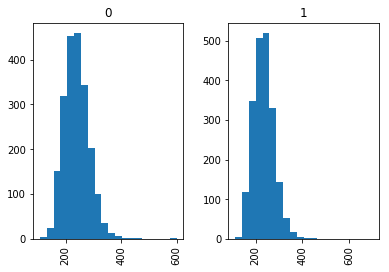

In [175]:
hist = q5.hist(column='totChol', by='currentSmoker', bins=20)